## Import all packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
from datetime import date
import math
import random
import swifter

## Import data sets

In [2]:
#read in the data

chi_data = pd.read_csv("chicago_2017.csv")
chi_weather = pd.read_csv("weather_hourly_chicago.csv")

## General information about the raw data

### chicago_2017 data set

In [3]:
#chi_data.info()

In [4]:
#chi_data.describe()

In [5]:
#chi_data.head()

### weather_hourly_chicago data set

In [6]:
#chi_weather.info()

In [7]:
#chi_weather.describe()

In [8]:
#chi_data.head()

## Add date time features to chi_data

In [9]:
chi_data['start_time']= pd.to_datetime(chi_data['start_time'])

In [10]:
chi_data['end_time'] = pd.to_datetime(chi_data['end_time'])

In [11]:
chi_data.sort_values(['start_time'], inplace = True) #Sorts the values by date 

In [12]:
chi_data["Date"] = chi_data['start_time'].swifter.apply(lambda dt: dt.date())

In [13]:
chi_data["Month"] = chi_data['start_time'].swifter.apply(lambda dt: dt.month)

In [14]:
chi_data["Week"] = chi_data['start_time'].swifter.apply(lambda dt: dt.isocalendar()[1])

In [15]:
chi_data["Hour"] = chi_data['start_time'].swifter.apply(lambda dt: dt.hour)

In [16]:
chi_data["Weekday"] = chi_data['start_time'].swifter.apply(lambda dt: dt.weekday())

In [17]:
chi_data['Duration'] = (chi_data['end_time']-chi_data['start_time'])

In [18]:
chi_data["Duration_sec"] = chi_data["Duration"].swifter.apply(lambda x: x.total_seconds())

In [19]:
chi_data["IsWeekday"] = chi_data["Weekday"].swifter.apply(lambda x: 1 if x < 5 else 0)

In [20]:
#chi_data.head()

## Add date weather features to chi_weather_2017

In [21]:
chi_weather['date_time']=pd.to_datetime(chi_weather['date_time'])

In [22]:
first_date = datetime(year=2017, day=1, month=1)
last_date = datetime(year=2017, day=31, month=12)
chi_weather_2017 = chi_weather[(chi_weather['date_time']>=first_date)&(chi_weather["date_time"] <= last_date)]

In [23]:
chi_weather_2017.sort_values(by = "date_time", inplace = True) #sort the values by date time

<ipython-input-23-dd50bfe8e1ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_weather_2017.sort_values(by = "date_time", inplace = True) #sort the values by date time


In [24]:
chi_weather_2017["Date"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.date())

<ipython-input-24-ff4fd3b3eea8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_weather_2017["Date"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.date())


In [25]:
chi_weather_2017['Month']= chi_weather_2017["date_time"].swifter.apply(lambda dt: dt.month)

<ipython-input-25-215697950b0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_weather_2017['Month']= chi_weather_2017["date_time"].swifter.apply(lambda dt: dt.month)


In [26]:
chi_weather_2017["Week"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.isocalendar()[1])

<ipython-input-26-c5b233e3b0fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_weather_2017["Week"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.isocalendar()[1])


In [27]:
chi_weather_2017["Hour"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.hour)

<ipython-input-27-414bd7212e72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_weather_2017["Hour"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.hour)


In [28]:
chi_weather_2017["Weekday"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.weekday())

<ipython-input-28-0c176fc0de61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_weather_2017["Weekday"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.weekday())


In [29]:
chi_weather_2017["mean_temp"] = (chi_weather_2017['max_temp']+chi_weather_2017['min_temp'])/2

<ipython-input-29-8167fca2a13d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_weather_2017["mean_temp"] = (chi_weather_2017['max_temp']+chi_weather_2017['min_temp'])/2


In [30]:
#chi_weather_2017.head()

# Data collection and preparation

In [31]:
chi_data['Duration'].describe()

count                      3829014
mean     0 days 00:15:55.628900286
std      0 days 00:26:09.592677187
min              -1 days +23:08:00
25%                0 days 00:06:46
50%                0 days 00:11:25
75%                0 days 00:19:06
max                0 days 23:58:58
Name: Duration, dtype: object

In [32]:
chi_data['Duration'].value_counts()

0 days 00:05:00    55446
0 days 00:06:00    54179
0 days 00:07:00    51548
0 days 00:04:00    50249
0 days 00:08:00    47799
                   ...  
0 days 10:46:21        1
0 days 02:32:31        1
0 days 04:49:03        1
0 days 05:07:56        1
0 days 07:12:50        1
Name: Duration, Length: 16265, dtype: int64

In [33]:
chi_data.sort_values (by= 'Duration')

start_time            end_time  start_station_id  \
3448503 2017-11-05 01:56:00 2017-11-05 01:04:00               295   
3448505 2017-11-05 01:54:00 2017-11-05 01:06:00               321   
3448506 2017-11-05 01:54:00 2017-11-05 01:06:00               321   
3448504 2017-11-05 01:54:00 2017-11-05 01:06:00               321   
3448500 2017-11-05 01:59:00 2017-11-05 01:13:00               327   
...                     ...                 ...               ...   
440556  2017-06-30 14:32:51 2017-07-01 14:27:16                84   
1278923 2017-05-01 15:00:41 2017-05-02 14:55:37               328   
877116  2017-06-04 13:07:01 2017-06-05 13:04:05               438   
21192   2017-03-27 20:09:57 2017-03-28 20:07:30                31   
29979   2017-03-26 08:07:43 2017-03-27 08:06:41               176   

         end_station_id            start_station_name  \
3448503             231          Broadway & Argyle St   
3448505             197           Wabash Ave & 9th St   
3448506             197           Wabash Ave & 9th St   
3448504             197           Wabash Ave & 9th St   
3448500             300   Sheffield Ave & Webster Ave   
...                 ...                           ...   
440556              508     Milwaukee Ave & Grand Ave   
1278923             420           Ellis Ave & 58th St   
877116              438  Central Park Ave & Ogden Ave   
21192                46     Franklin St & Chicago Ave   
29979               331             Clark St & Elm St   

                      end_station_name  bike_id   user_type        Date  \
3448503     Sheridan Rd & Montrose Ave     6085  Subscriber  2017-11-05   
3448505      Michigan Ave & Madison St     5707    Customer  2017-11-05   
3448506      Michigan Ave & Madison St     2083    Customer  2017-11-05   
3448504      Michigan Ave & Madison St     4905    Customer  2017-11-05   
3448500           Broadway & Barry Ave     6061  Subscriber  2017-11-05   
...                                ...      ...         ...         ...   
440556    Central Park Ave & North Ave     4914    Customer  2017-06-30   
1278923            Ellis Ave & 55th St     1146  Subscriber  2017-05-01   
877116    Central Park Ave & Ogden Ave      735    Customer  2017-06-04   
21192             Wells St & Walton St     4563    Customer  2017-03-27   
29979    Halsted St & Blackhawk St (*)     1138    Customer  2017-03-26   

         Month  Week  Hour  Weekday          Duration  Duration_sec  IsWeekday  
3448503     11    44     1        6 -1 days +23:08:00       -3120.0          0  
3448505     11    44     1        6 -1 days +23:12:00       -2880.0          0  
3448506     11    44     1        6 -1 days +23:12:00       -2880.0          0  
3448504     11    44     1        6 -1 days +23:12:00       -2880.0          0  
3448500     11    44     1        6 -1 days +23:14:00       -2760.0          0  
...        ...   ...   ...      ...               ...           ...        ...  
440556       6    26    14        4   0 days 23:54:25       86065.0          1  
1278923      5    18    15        0   0 days 23:54:56       86096.0          1  
877116       6    22    13        6   0 days 23:57:04       86224.0          0  
21192        3    13    20        0   0 days 23:57:33       86253.0          1  
29979        3    12     8        6   0 days 23:58:58       86338.0          0  

[3829014 rows x 16 columns]

In [35]:
chi_data_60sec_trips=chi_data[chi_data.Duration == 60]
chi_data_60sec_trips.count()

#checking quantity of very short trips

start_time            0
end_time              0
start_station_id      0
end_station_id        0
start_station_name    0
end_station_name      0
bike_id               0
user_type             0
Date                  0
Month                 0
Week                  0
Hour                  0
Weekday               0
Duration              0
Duration_sec          0
IsWeekday             0
dtype: int64

In [36]:
chi_data_idcheck = chi_data[['start_station_id', 'start_station_name']]

In [39]:
grouped_chi_data = chi_data_idcheck.groupby(['start_station_id'])
grouped_chi_data = grouped_chi_data.agg({"start_station_name": "nunique"})

grouped_chi_data = grouped_chi_data. reset_index()

print(grouped_chi_data)

     start_station_id  start_station_name
0                   2                   1
1                   3                   1
2                   4                   1
3                   5                   1
4                   6                   1
..                ...                 ...
580               622                   1
581               623                   1
582               624                   1
583               625                   1
584               626                   1

[585 rows x 2 columns]


In [41]:
bad_ids = grouped_chi_data[grouped_chi_data['start_station_name']>1]
bad_ids

#listing IDs that are associated with multiple names

start_station_id  start_station_name
13                 17                   2
49                 53                   2
67                 75                   2
298               321                   2
401               437                   2
443               480                   2
503               544                   2
533               574                   2

In [42]:
#chi_data.to_csv('cleanedtrips.csv')

# Descriptive analystics

## Fleet size

In [43]:
bikes = len(chi_data['bike_id'].unique())
print("The overall number of bikes is {}".format(bikes))

The overall number of bikes is 6243


## Temporal demand patterns

### Bike rentals

#### Bike rentals per month

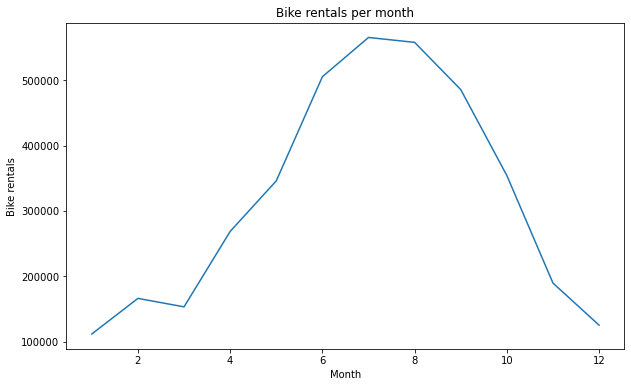

In [44]:
rentals_month = chi_data.groupby(['Month'])['bike_id'].count()
rentals_month = pd.DataFrame(rentals_month)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(rentals_month)
ax.set_title('Bike rentals per month')
ax.set_xlabel('Month')
ax.set_ylabel("Bike rentals")
plt.show()

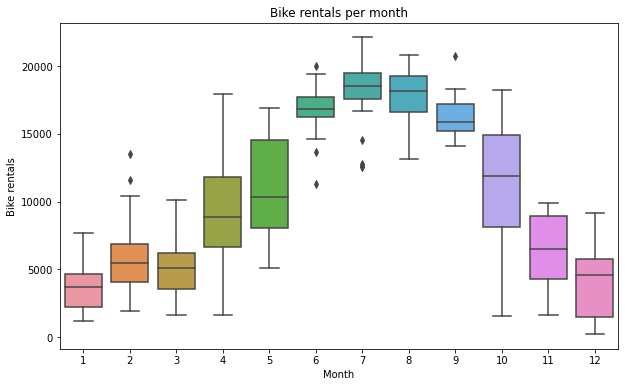

In [45]:
rentals_month_bp = chi_data.groupby(['Date','Month'])['bike_id'].count()
rentals_month_bp = pd.DataFrame(rentals_month_bp)

fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x = rentals_month_bp.index.get_level_values('Month'), y =rentals_month_bp['bike_id'], ax = ax)
ax.set_title('Bike rentals per month')
ax.set_ylabel("Bike rentals")
plt.show()

#### Bike rentals per week

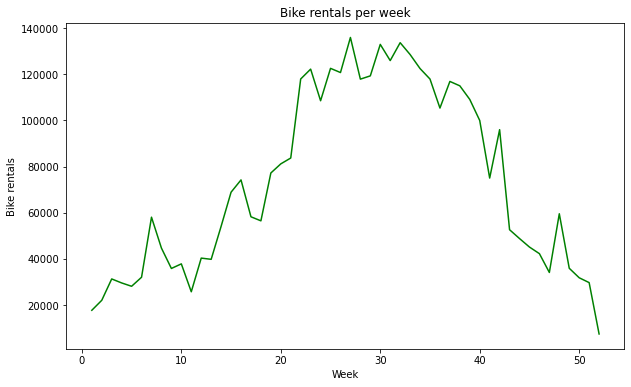

In [46]:
rentals_week = chi_data.groupby("Week")['bike_id'].count()
rentals_week = pd.DataFrame(rentals_week)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(rentals_week, c = "green")

ax.set_title('Bike rentals per week')
ax.set_ylabel("Bike rentals")
ax.set_xlabel("Week")
plt.show()

#### Bike rentals per weekday

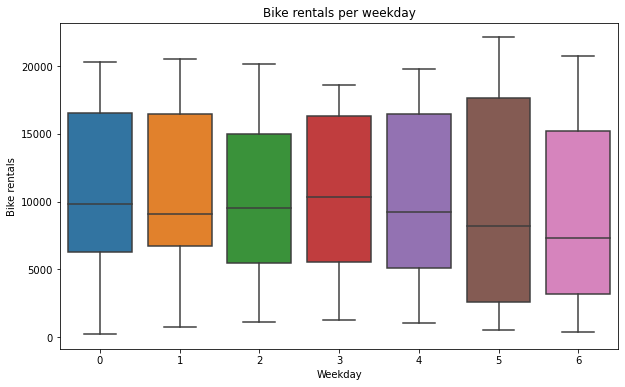

In [47]:
rentals_weekday = chi_data.groupby(['Weekday','Date'])['bike_id'].count()
rentals_weekday = pd.DataFrame(rentals_weekday)

fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x = rentals_weekday.index.get_level_values('Weekday'), y =rentals_weekday['bike_id'], ax = ax)
ax.set_title('Bike rentals per weekday')
ax.set_ylabel("Bike rentals")

plt.show()

In [48]:
# legende Zahl - Wochentag

#### Bike rentals over year per day 

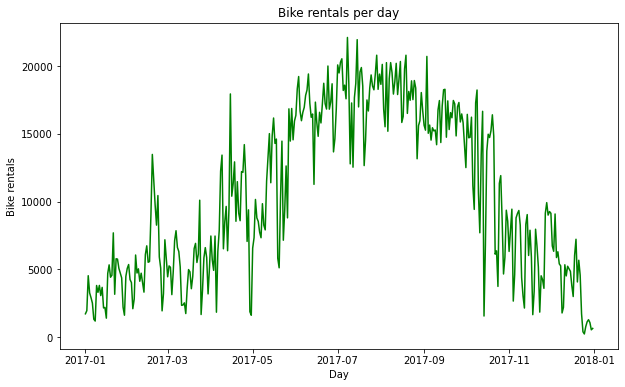

In [49]:
rentals_day = chi_data.groupby("Date")['bike_id'].count()
rentals_day = pd.DataFrame(rentals_day)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(rentals_day, c = "green")

ax.set_title('Bike rentals per day')
ax.set_ylabel("Bike rentals")
ax.set_xlabel("Day")
plt.show()

#### Bike rentals per hour

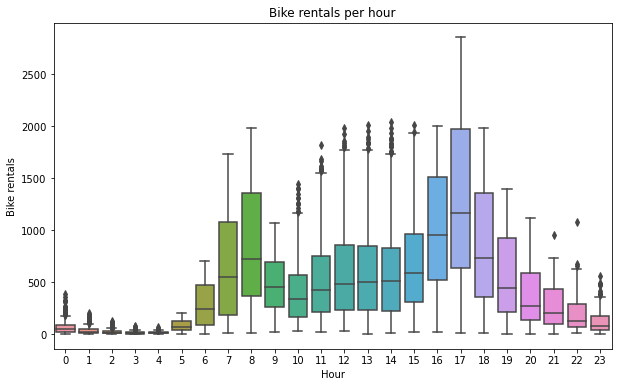

bike_id
Date       Hour         
2017-01-01 0          46
           1          46
           2          36
           3          18
           4           6
...                  ...
2017-12-31 19         20
           20         20
           21         13
           22          9
           23          9

[8743 rows x 1 columns]

In [50]:
rentals_hour = chi_data.groupby(["Date","Hour"])['bike_id'].count()
rentals_hour =pd.DataFrame(rentals_hour)

fig, ax = plt.subplots(figsize = (10,6))


sns.boxplot(x = rentals_hour.index.get_level_values("Hour"), y =rentals_hour['bike_id'], ax = ax)
ax.set_title('Bike rentals per hour')
ax.set_ylabel("Bike rentals")
plt.show()
rentals_hour

<function matplotlib.pyplot.show(close=None, block=None)>

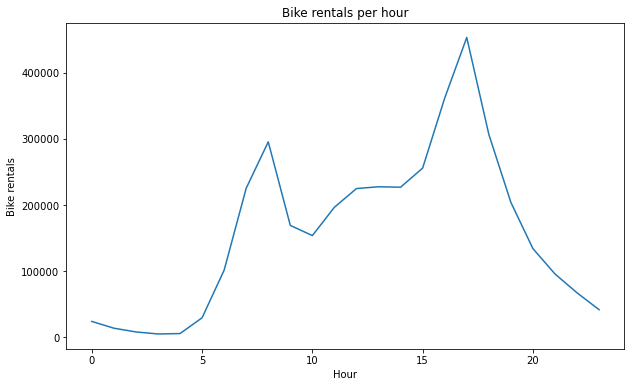

In [51]:
rentals_hour = chi_data.groupby(['Hour'])['bike_id'].count()
rentals_hour = pd.DataFrame(rentals_hour)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(rentals_hour)
ax.set_title('Bike rentals per hour')
ax.set_ylabel("Bike rentals")
ax.set_xlabel("Hour")
plt.show

#### Correlation between weekday, hour & rentals???

### Duration/Travel time

#### Duration per week

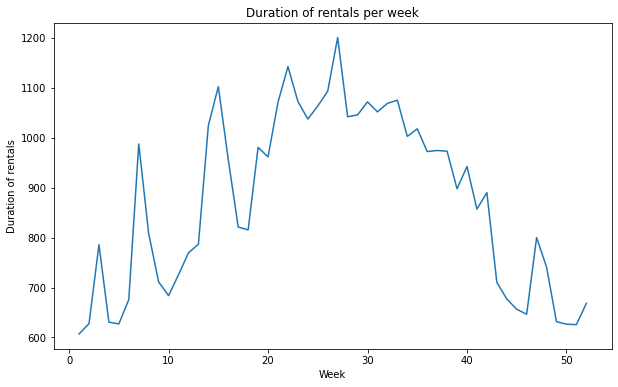

In [52]:
duration_week = chi_data.groupby("Week")["Duration_sec"].mean()
duration_week = pd.DataFrame(duration_week)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(duration_week)

ax.set_title('Duration of rentals per week')
ax.set_ylabel('Duration of rentals')
ax.set_xlabel('Week')
plt.show()

#### Duration per weekday

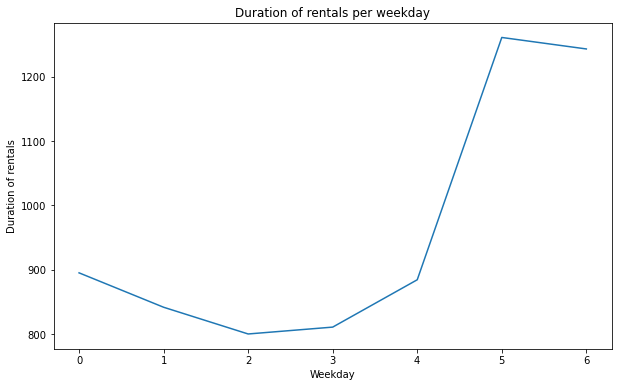

In [53]:
duration_weekday = chi_data.groupby("Weekday")["Duration_sec"].mean()
duration_weekday = pd.DataFrame(duration_weekday)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(duration_weekday)

ax.set_title('Duration of rentals per weekday')
ax.set_ylabel('Duration of rentals')
ax.set_xlabel('Weekday')
plt.show()

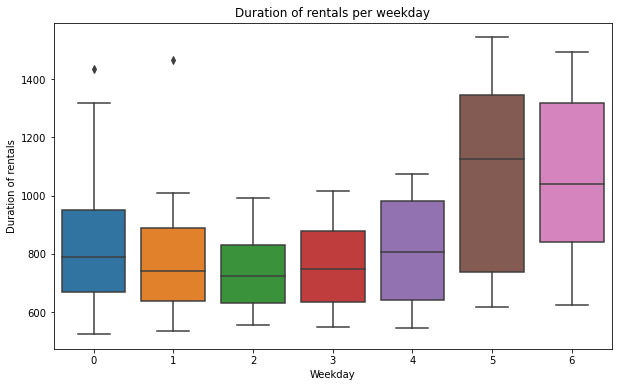

In [54]:
duration_weekday_bp = chi_data.groupby(["Date","Weekday"])['Duration_sec'].mean()
duration_weekday_bp =pd.DataFrame(duration_weekday_bp)

fig, ax = plt.subplots(figsize = (10,6))


sns.boxplot(x = duration_weekday_bp.index.get_level_values("Weekday"), y =duration_weekday_bp['Duration_sec'], ax = ax)
ax.set_title('Duration of rentals per weekday')
ax.set_ylabel('Duration of rentals')
plt.show()

#### Duration per hour

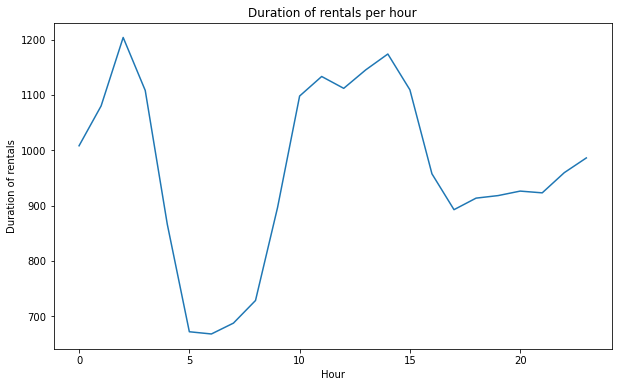

In [55]:
duration_hour = chi_data.groupby("Hour")["Duration_sec"].mean()
duration_hour = pd.DataFrame(duration_hour)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(duration_hour)

ax.set_title('Duration of rentals per hour')
ax.set_ylabel('Duration of rentals')
ax.set_xlabel('Hour')
plt.show()

### Weather

#### Temperature monthly

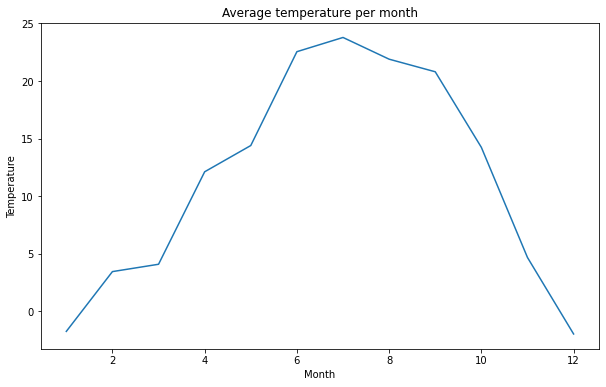

In [56]:
temp_month_mean = chi_weather_2017.groupby("Month")["mean_temp"].mean()

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(temp_month_mean)
ax.set_xlabel('Month')
ax.set_ylabel('Temperature')
ax.set_title("Average temperature per month")

plt.show()

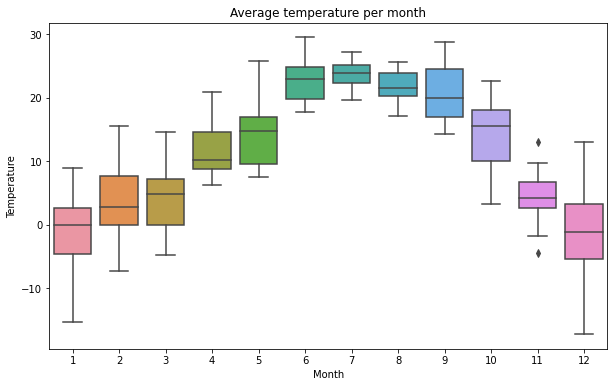

In [57]:
temp_month_mean_bp = chi_weather_2017.groupby(['Date','Month'])['mean_temp'].mean()
temp_month_mean_bp = pd.DataFrame(temp_month_mean_bp)

fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x = temp_month_mean_bp.index.get_level_values('Month'), y =temp_month_mean_bp['mean_temp'], ax = ax)

ax.set_title('Average temperature per month')
ax.set_ylabel("Temperature")
ax.set_xlabel("Month")
plt.show()

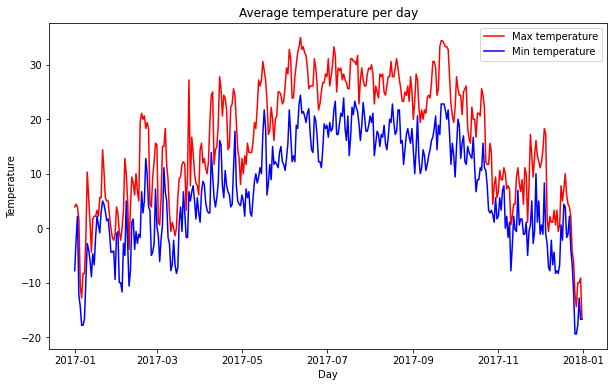

In [58]:
temp_day_min = chi_weather_2017.groupby("Date")["mean_temp"].min()

temp_day_max = chi_weather_2017.groupby("Date")["mean_temp"].max()

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(temp_day_max, c = "red", label = "Max temperature")
ax.plot(temp_day_min, c = "blue", label = "Min temperature")
plt.legend()
ax.set_title('Average temperature per day')
ax.set_ylabel("Temperature")
ax.set_xlabel('Day')

plt.show()

#### Temperature weekly

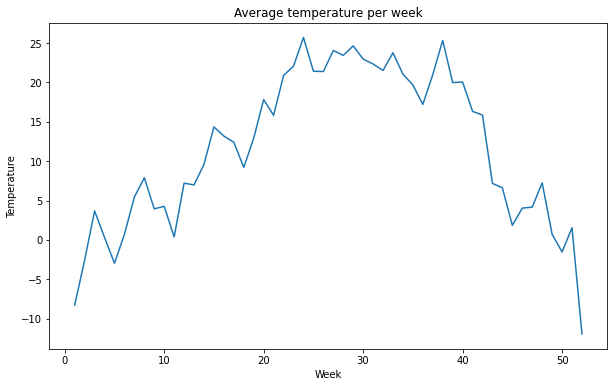

In [59]:
temp_week_mean = chi_weather_2017.groupby("Week")["mean_temp"].mean()

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(temp_week_mean)
ax.set_ylabel("Temperature")
ax.set_xlabel('Week')
ax.set_title('Average temperature per week')
plt.show()

#### Temperature daily

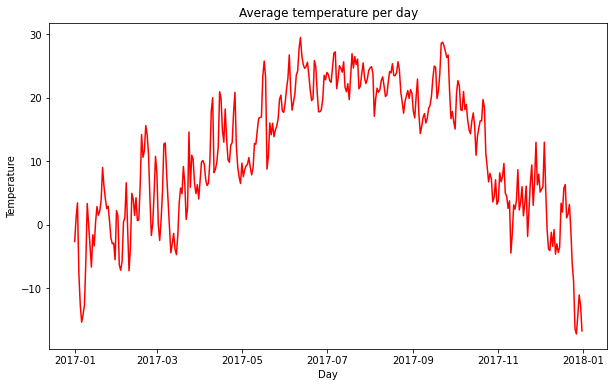

In [60]:
temp_day_mean = chi_weather_2017.groupby("Date")["mean_temp"].mean()

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(temp_day_mean, c = "red")
ax.set_title('Average temperature per day')
ax.set_ylabel("Temperature")
ax.set_xlabel('Day')

plt.show()

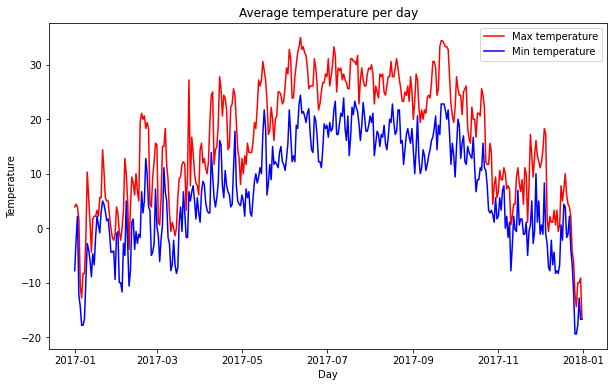

In [61]:
temp_day_min = chi_weather_2017.groupby("Date")["mean_temp"].min()

temp_day_max = chi_weather_2017.groupby("Date")["mean_temp"].max()

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(temp_day_max, c = "red", label = "Max temperature")
ax.plot(temp_day_min, c = "blue", label = "Min temperature")
plt.legend()
ax.set_title('Average temperature per day')
ax.set_ylabel("Temperature")
ax.set_xlabel('Day')

plt.show()

#### Precip monthly

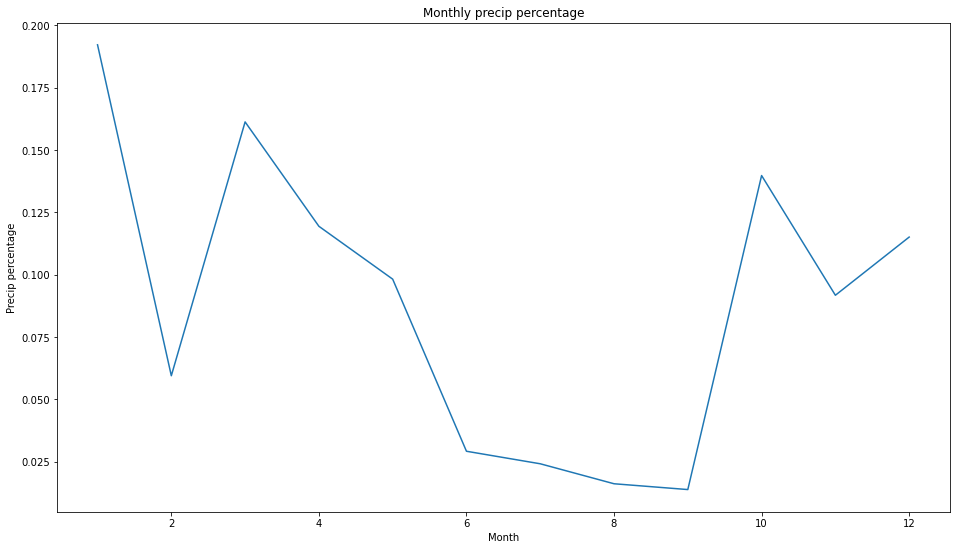

In [62]:
precip_month_mean = chi_weather_2017.groupby("Month")["precip"].mean()

fig, ax = plt.subplots(figsize = (16,9))

ax.plot(precip_month_mean)
ax.set_xlabel('Month')
ax.set_ylabel('Precip percentage')
ax.set_title("Monthly precip percentage")

plt.show()

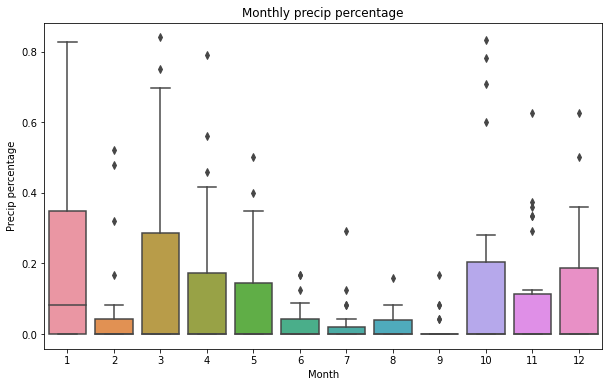

In [63]:
precip_month_mean_bp = chi_weather_2017.groupby(['Date','Month'])['precip'].mean()
precip_month_mean_bp = pd.DataFrame(precip_month_mean_bp)

fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x = precip_month_mean_bp.index.get_level_values('Month'), y =precip_month_mean_bp['precip'], ax = ax)

ax.set_xlabel('Month')
ax.set_ylabel('Precip percentage')
ax.set_title("Monthly precip percentage")
plt.show()

#### Precip weekly

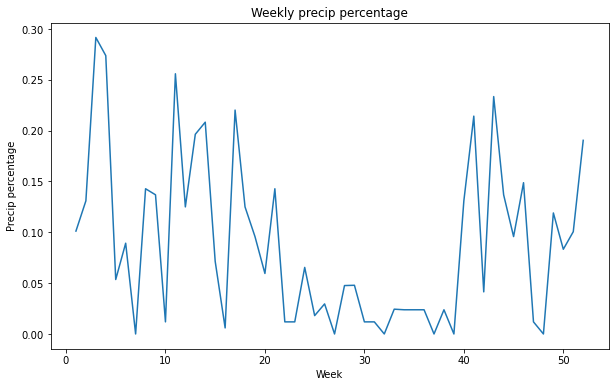

In [64]:
precip_week_mean = chi_weather_2017.groupby("Week")["precip"].mean()

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(precip_week_mean)
ax.set_title('Weekly precip percentage')
ax.set_ylabel("Precip percentage")
ax.set_xlabel('Week')
plt.show()

#### Precip daily

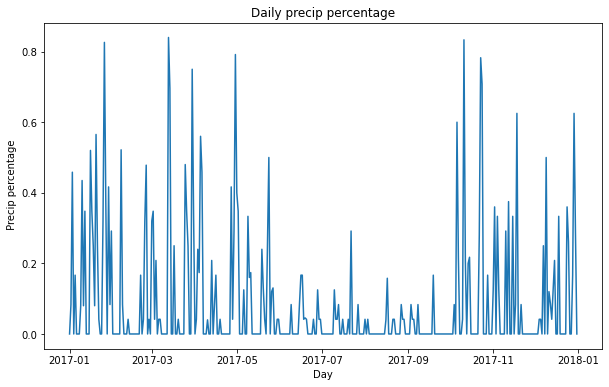

In [65]:
precip_day_mean = chi_weather_2017.groupby("Date")["precip"].mean()

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(precip_day_mean)
ax.set_title('Daily precip percentage')
ax.set_ylabel(" Precip percentage")
ax.set_xlabel('Day')
plt.show()

### Correlation between rentals and weather 

#### Rescaling

In [66]:
rentals_day_resc = (rentals_day-rentals_day.min())/(rentals_day.max()-rentals_day.min())

rentals_week_resc = ((rentals_week-rentals_week.min())/(rentals_week.max()-rentals_week.min()))

rentals_month_resc = ((rentals_month-rentals_month.min())/(rentals_month.max()-rentals_month.min()))

precip_day_resc = (precip_day_mean-precip_day_mean.min())/(precip_day_mean.max()-precip_day_mean.min())

precip_week_resc = (precip_week_mean-precip_week_mean.min())/(precip_week_mean.max()-precip_week_mean.min())

precip_month_resc = (precip_month_mean-precip_month_mean.min())/(precip_month_mean.max()-precip_month_mean.min())

temp_day_resc = (temp_day_mean-temp_day_mean.min())/(temp_day_mean.max()-temp_day_mean.min())

temp_week_resc = (temp_week_mean-temp_week_mean.min())/(temp_week_mean.max()-temp_week_mean.min())

temp_month_resc = ((temp_month_mean-temp_month_mean.min())/(temp_month_mean.max()-temp_month_mean.min()))

#### Rentals and temperatur

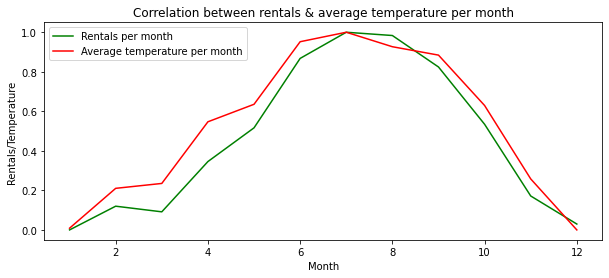

In [67]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(rentals_month_resc, c = 'green', label='Rentals per month')
ax.plot(temp_month_resc, c = 'red', label='Average temperature per month')

ax.set_title('Correlation between rentals & average temperature per month')
ax.set_xlabel('Month')
ax.set_ylabel('Rentals/Temperature')
ax.legend()

plt.show()

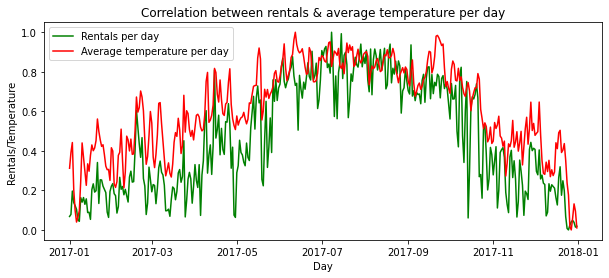

In [68]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(rentals_day_resc, c = 'green', label='Rentals per day')
ax.plot(temp_day_resc, c = 'red', label='Average temperature per day')

ax.set_title('Correlation between rentals & average temperature per day')
ax.set_xlabel('Day')
ax.set_ylabel('Rentals/Temperature')
ax.legend()

plt.show()

In [69]:
#Put weather & rental data into the same data frame
temp_rentals_day = chi_weather_2017.groupby(["Date"])["mean_temp"].mean()
temp_rentals_day = pd.DataFrame(temp_rentals_day)
temp_rentals_day ["Rentals"] = chi_data.groupby(['Date'])['bike_id'].count()
temp_rentals_day ["IsWeekday"] = chi_data.groupby(['Date'])['IsWeekday'].max()

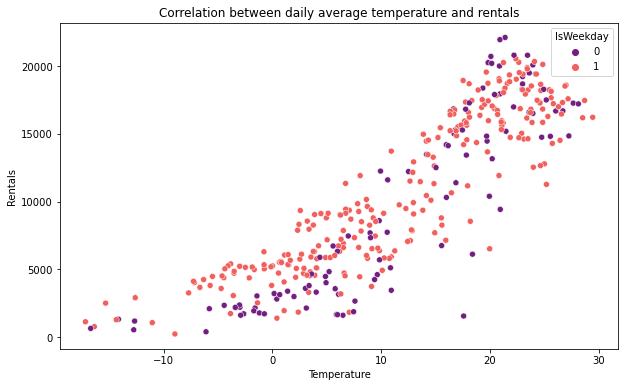

In [70]:

fig, ax = plt.subplots(figsize = (10,6))

sns.scatterplot(x = temp_rentals_day["mean_temp"], y= temp_rentals_day["Rentals"], hue = temp_rentals_day["IsWeekday"],palette="magma" )
ax.set_title("Correlation between daily average temperature and rentals")
ax.set_xlabel("Temperature")
plt.show()

In [71]:
#Put weather & rental data into the same data frame
precip_rentals_day = chi_weather_2017.groupby(["Date"])["precip"].mean()
precip_rentals_day = pd.DataFrame(precip_rentals_day)
precip_rentals_day ["Rentals"] = chi_data.groupby(['Date'])['bike_id'].count()
precip_rentals_day ["IsWeekday"] = chi_data.groupby(['Date'])['IsWeekday'].max()

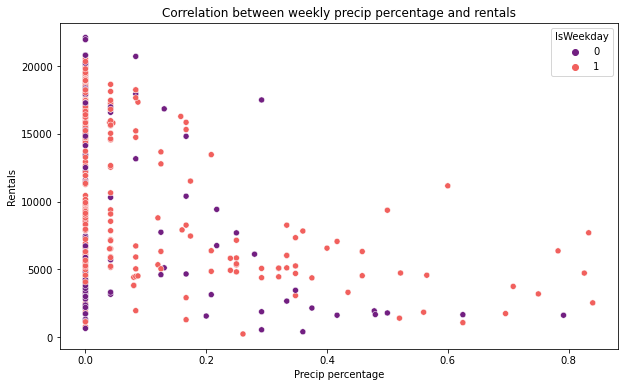

In [72]:

fig, ax = plt.subplots(figsize = (10,6))

sns.scatterplot(x = precip_rentals_day["precip"], y= precip_rentals_day["Rentals"], hue = precip_rentals_day["IsWeekday"],palette="magma" )
ax.set_title("Correlation between weekly precip percentage and rentals")
ax.set_xlabel("Precip percentage")
plt.show()

#### Rentals and precip

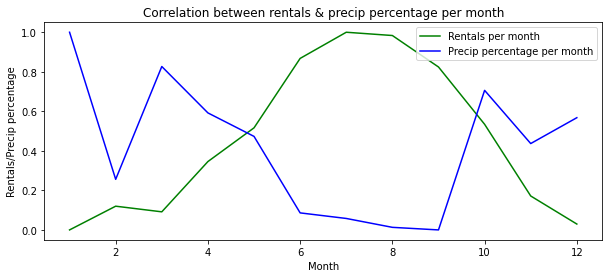

In [73]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(rentals_month_resc, c = 'green', label='Rentals per month')
ax.plot(precip_month_resc, c = 'blue', label='Precip percentage per month')

ax.set_title('Correlation between rentals & precip percentage per month')
ax.set_xlabel('Month')
ax.set_ylabel('Rentals/Precip percentage')
ax.legend()

plt.show()

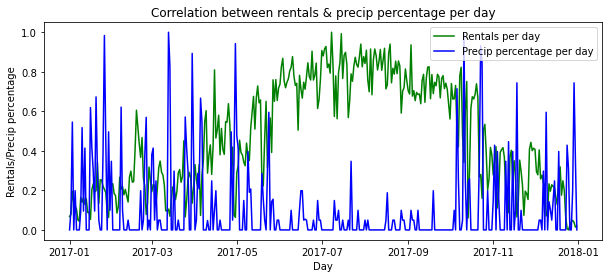

In [74]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(rentals_day_resc, c = 'green', label='Rentals per day')
ax.plot(precip_day_resc, c = 'blue', label='Precip percentage per day')

ax.set_title('Correlation between rentals & precip percentage per day')
ax.set_xlabel('Day')
ax.set_ylabel('Rentals/Precip percentage')
ax.legend()

plt.show()

## Geographical demand patterns (Emilio & Alex)

## KPIs

### Total bike usage

In [75]:
chi_data["date_hour"] = chi_data["start_time"].dt.floor("H")

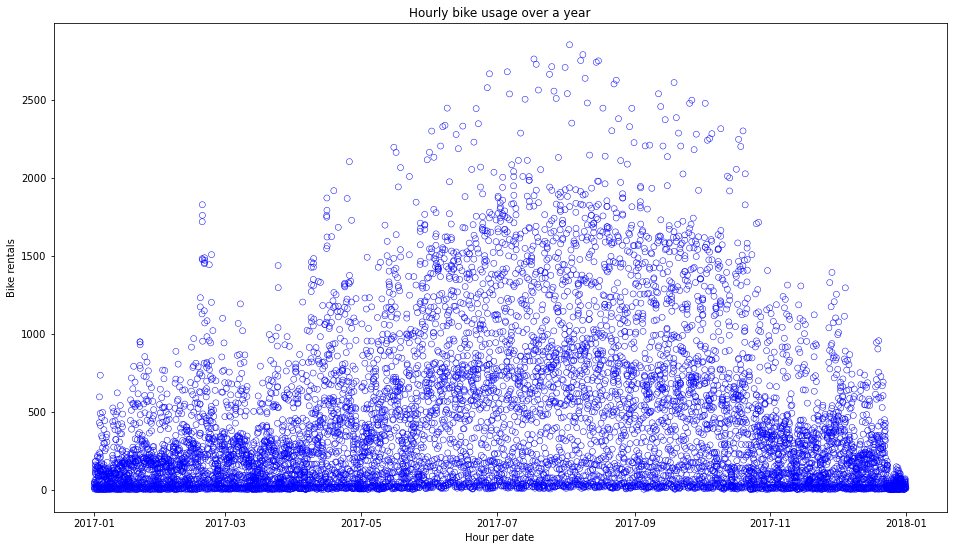

In [76]:
rentals_date_hour = chi_data.groupby("date_hour")['bike_id'].count()
rentals_date_hour =pd.DataFrame(rentals_date_hour)

fig, ax = plt.subplots(figsize = (16,9))


sns.scatterplot(x = rentals_date_hour.index.get_level_values("date_hour"), y =rentals_date_hour['bike_id'], ax = ax, color = "none", ec = "blue")
ax.set_title('Hourly bike usage over a year')
ax.set_ylabel("Bike rentals")
ax.set_xlabel("Hour per date")
plt.show()

In [77]:
rentals_date_hour["date_hour"] =rentals_date_hour.index

In [78]:
rentals_date_hour["Hour"] = rentals_date_hour['date_hour'].swifter.apply(lambda dt: dt.hour)
rentals_date_hour["Month"] = rentals_date_hour['date_hour'].swifter.apply(lambda dt: dt.month)
rentals_date_hour["Day"] = rentals_date_hour['date_hour'].swifter.apply(lambda dt: dt.day)
rentals_date_hour.pop("date_hour")

date_hour
2017-01-01 00:00:00   2017-01-01 00:00:00
2017-01-01 01:00:00   2017-01-01 01:00:00
2017-01-01 02:00:00   2017-01-01 02:00:00
2017-01-01 03:00:00   2017-01-01 03:00:00
2017-01-01 04:00:00   2017-01-01 04:00:00
                              ...        
2017-12-31 19:00:00   2017-12-31 19:00:00
2017-12-31 20:00:00   2017-12-31 20:00:00
2017-12-31 21:00:00   2017-12-31 21:00:00
2017-12-31 22:00:00   2017-12-31 22:00:00
2017-12-31 23:00:00   2017-12-31 23:00:00
Name: date_hour, Length: 8743, dtype: datetime64[ns]

In [79]:
#Function that returns the total bike usage of specified day, month and hour.
def calculateNumberRentalsSpecificHour(day, month, hour):
    x = rentals_date_hour[(rentals_date_hour["Day"] == day) & (rentals_date_hour["Month"] == month) & (rentals_date_hour["Hour"] == hour)]
    y = x["bike_id"]
    y = pd.DataFrame(y)
    return y

In [80]:
#Output for 02.01.2017 hour 1
calculateNumberRentalsSpecificHour(2, 1, 1)

bike_id
date_hour                   
2017-01-02 01:00:00       10

### Fleet utilization

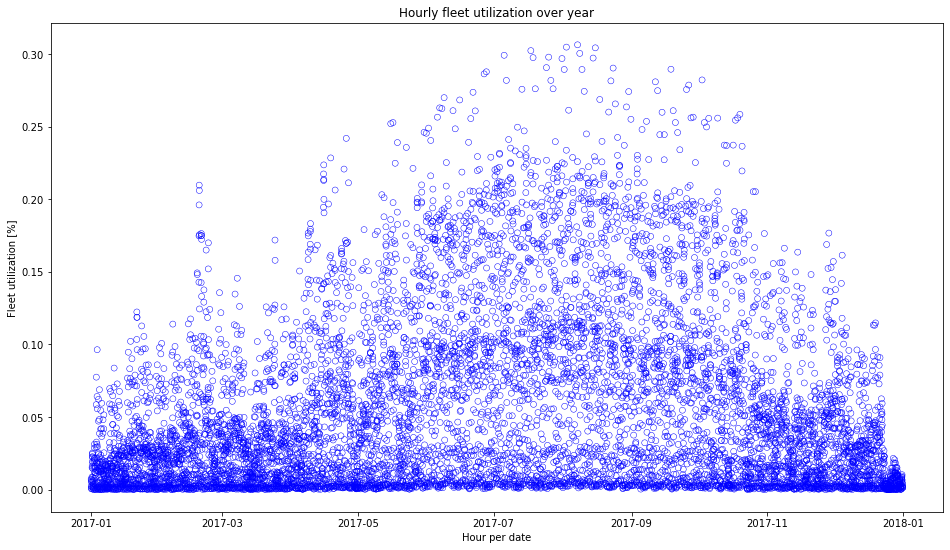

In [81]:
fleet_utilization = chi_data.groupby("date_hour")['bike_id'].nunique()/bikes
fleet_utilization =pd.DataFrame(fleet_utilization)

fig, ax = plt.subplots(figsize = (16,9))


sns.scatterplot(x = fleet_utilization.index.get_level_values("date_hour"), y =fleet_utilization['bike_id'], ax = ax, color = "none", ec = "blue")
ax.set_title('Hourly fleet utilization over year')
ax.set_ylabel("Fleet utilization [%]")
ax.set_xlabel("Hour per date")
plt.show()

In [82]:
fleet_utilization["date_hour"] =fleet_utilization.index
fleet_utilization["Hour"] = fleet_utilization['date_hour'].swifter.apply(lambda dt: dt.hour)
fleet_utilization["Month"] = fleet_utilization['date_hour'].swifter.apply(lambda dt: dt.month)
fleet_utilization["Day"] = fleet_utilization['date_hour'].swifter.apply(lambda dt: dt.day)
fleet_utilization.pop("date_hour")

date_hour
2017-01-01 00:00:00   2017-01-01 00:00:00
2017-01-01 01:00:00   2017-01-01 01:00:00
2017-01-01 02:00:00   2017-01-01 02:00:00
2017-01-01 03:00:00   2017-01-01 03:00:00
2017-01-01 04:00:00   2017-01-01 04:00:00
                              ...        
2017-12-31 19:00:00   2017-12-31 19:00:00
2017-12-31 20:00:00   2017-12-31 20:00:00
2017-12-31 21:00:00   2017-12-31 21:00:00
2017-12-31 22:00:00   2017-12-31 22:00:00
2017-12-31 23:00:00   2017-12-31 23:00:00
Name: date_hour, Length: 8743, dtype: datetime64[ns]

In [83]:
#Function that returns the relative utilization of the fleet for a specified day, month and hour.
def calculateFleetUtilization(day, month, hour):
    x = fleet_utilization[(fleet_utilization["Day"] == day) & (fleet_utilization["Month"] == month) & (fleet_utilization["Hour"] == hour)]
    y = x["bike_id"]
    y = pd.DataFrame(y)
    return y

In [84]:
#Output for 15.08.2017 hour 8
calculateFleetUtilization(15,8,8)

bike_id
date_hour                    
2017-08-15 08:00:00  0.229217

### Duration of rentals

In [85]:
duration = chi_data.groupby("date_hour")['Duration_sec'].mean()
duration =pd.DataFrame(duration)
duration["mean_minutes"]= duration["Duration_sec"]/60
duration["min_minutes"]=  chi_data.groupby("date_hour")['Duration_sec'].min()/60
duration["max_minutes"]=  chi_data.groupby("date_hour")['Duration_sec'].max()/60
duration

Duration_sec  mean_minutes  min_minutes  max_minutes
date_hour                                                                
2017-01-01 00:00:00   1569.782609     26.163043     1.466667   646.350000
2017-01-01 01:00:00    685.739130     11.428986     2.083333    30.083333
2017-01-01 02:00:00    503.777778      8.396296     1.183333    27.133333
2017-01-01 03:00:00    694.888889     11.581481     1.833333    28.833333
2017-01-01 04:00:00    508.666667      8.477778     1.283333    16.850000
...                           ...           ...          ...          ...
2017-12-31 19:00:00    741.000000     12.350000     3.000000    35.000000
2017-12-31 20:00:00    759.000000     12.650000     3.000000    30.000000
2017-12-31 21:00:00    636.923077     10.615385     2.000000    41.000000
2017-12-31 22:00:00    473.333333      7.888889     2.000000    20.000000
2017-12-31 23:00:00    600.000000     10.000000     2.000000    24.000000

[8743 rows x 4 columns]

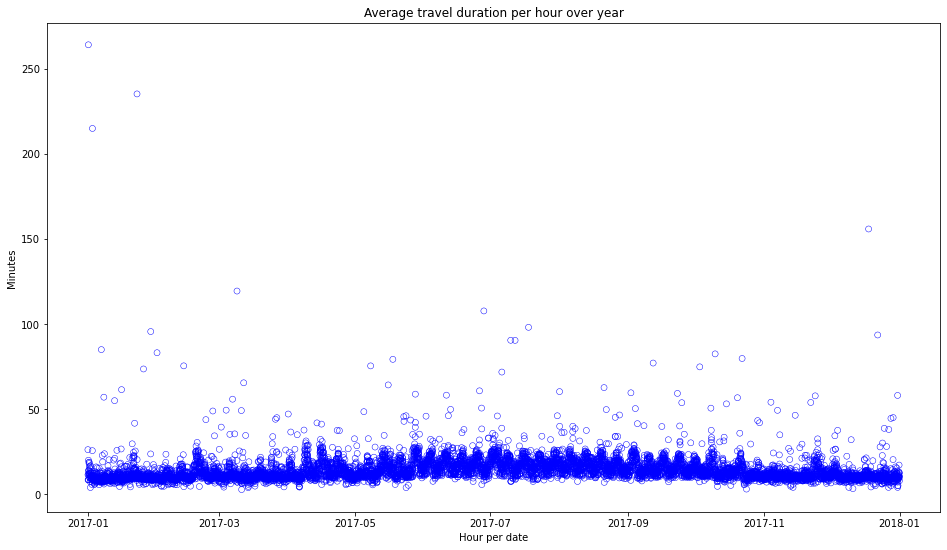

In [86]:
fig, ax = plt.subplots(figsize = (16,9))


sns.scatterplot(x = duration.index.get_level_values("date_hour"), y =duration['mean_minutes'], ax = ax, color = "none", ec = "blue")
ax.set_title('Average travel duration per hour over year')
ax.set_ylabel("Minutes")
ax.set_xlabel("Hour per date")
plt.show()

In [87]:
duration["date_hour"] =duration.index
duration["Hour"] = duration['date_hour'].swifter.apply(lambda dt: dt.hour)
duration["Month"] = duration['date_hour'].swifter.apply(lambda dt: dt.month)
duration["Day"] = duration['date_hour'].swifter.apply(lambda dt: dt.day)
duration.pop("date_hour")

date_hour
2017-01-01 00:00:00   2017-01-01 00:00:00
2017-01-01 01:00:00   2017-01-01 01:00:00
2017-01-01 02:00:00   2017-01-01 02:00:00
2017-01-01 03:00:00   2017-01-01 03:00:00
2017-01-01 04:00:00   2017-01-01 04:00:00
                              ...        
2017-12-31 19:00:00   2017-12-31 19:00:00
2017-12-31 20:00:00   2017-12-31 20:00:00
2017-12-31 21:00:00   2017-12-31 21:00:00
2017-12-31 22:00:00   2017-12-31 22:00:00
2017-12-31 23:00:00   2017-12-31 23:00:00
Name: date_hour, Length: 8743, dtype: datetime64[ns]

In [88]:
#Function that returns the relative utilization of the fleet for a specified day, month and hour.
def calculateDuration(day, month, hour):
    x = duration[(duration["Day"] == day) & (duration["Month"] == month) & (duration["Hour"] == hour)]
    y = x["mean_minutes"]
    y = pd.DataFrame(y)
    y["min_minutes"] = x["min_minutes"]
    y["max_minutes"] = x["max_minutes"]

    return y

In [89]:
calculateDuration(1,1,0)

mean_minutes  min_minutes  max_minutes
date_hour                                         
2017-01-01     26.163043     1.466667       646.35